# Business Problem
## 1) Delivery_time -> Predict delivery time using sorting time

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Get the data & perform EDA

In [2]:
delivery_data = pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [4]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_data.shape

(21, 2)

In [6]:
delivery_data = delivery_data.set_axis(labels=['Delivery_Time','Sorting_Time'], axis=1)
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Perform Assumptions

## Linearity Test
1. Scatter Plot
2. lmplot

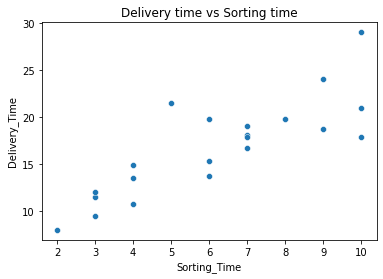

In [7]:
sns.scatterplot(x='Sorting_Time', y='Delivery_Time', data=delivery_data)
plt.title('Delivery time vs Sorting time')
plt.show()

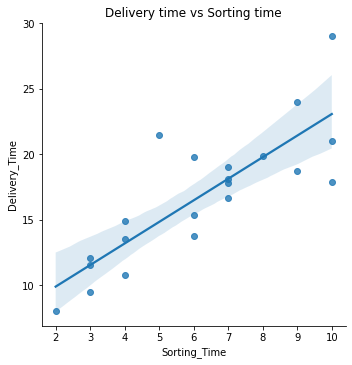

In [8]:
sns.lmplot(x='Sorting_Time', y='Delivery_Time', data=delivery_data)
plt.title('Delivery time vs Sorting time')
plt.show()

### From above graph, most of the points(observations) are not falling on the line. Hence, linearity test is failed.

## Normality test
1. Input features must follow normal distribution
2.  Histogram, Distplot test

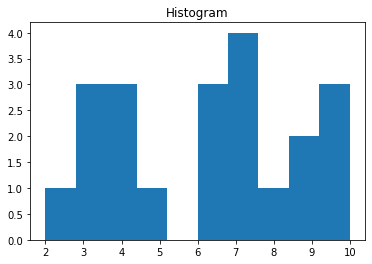

In [9]:
plt.hist(x= delivery_data['Sorting_Time'])
plt.title('Histogram')
plt.show()

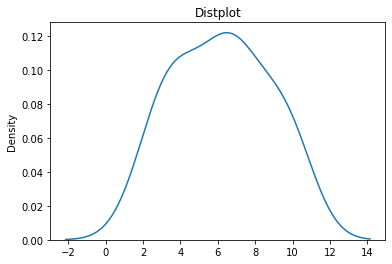

In [10]:
sns.distplot(x= delivery_data['Sorting_Time'], hist=False)
plt.title('Distplot')
plt.show()

In [11]:
delivery_data['Sorting_Time'].skew()

0.047115474210530174

In [12]:
delivery_data['Sorting_Time'].kurt()

-1.14845514534878

## From above graph, we can say that input data is fairly symmetrical. Hence, Normality test is passed.

## Multicollinearity Test
1. Correlation Matrix
2. Variance Inflation Factor [VIF]

### Since, there is only 1 input factor hence, there is no multicollinearity in the given data

## No Autoregression
* As there is no time based inputs in given data

## Homoscedasticity test & Zero Residual Mean test 
* To be done after model training!!

## Model Building


In [13]:
x = delivery_data.drop('Delivery_Time', axis=1)
y = delivery_data[['Delivery_Time']]

In [14]:
import statsmodels.formula.api as smf

In [15]:
linear_model = smf.ols(formula='y ~ x', data=delivery_data).fit()

In [16]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

## Model Evaluation 

In [17]:
y_pred = linear_model.predict(x)
y_pred = pd.DataFrame(data=y_pred, columns=['Delivery_Time'])
y_pred.round(2)

,Delivery_Time
0,23.07
1,13.18
2,16.48
3,21.42
4,23.07
5,16.48
6,18.13
7,11.53
8,23.07
9,21.42


In [18]:
error = y - y_pred.round(2)
error

,Delivery_Time
0,-2.07
1,0.32
2,3.27
3,2.58
4,5.93
5,-1.13
6,0.87
7,-2.03
8,-5.17
9,-2.67


In [19]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        12:06:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From above model we can see that r2 value is not significant for considering it to be best model. We need to perform some transformations.

In [20]:
linear_model2 = smf.ols(formula='y ~ np.log(x)', data=delivery_data).fit()

In [21]:
linear_model2.params

Intercept    1.159684
np.log(x)    9.043413
dtype: float64

In [22]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        12:06:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(x)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### There is a minimal increment in r2 value. We need to continue the transformation process until it reaches a significant value 

In [23]:
linear_model3 = smf.ols(formula='np.log(y) ~ x', data=delivery_data).fit()

In [24]:
linear_model3.params

Intercept    2.121372
x            0.105552
dtype: float64

In [25]:
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        12:06:10   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The r2 value has increased from previous two models but not to a good range.

In [26]:
delivery_data['Sq_Sorttime'] = delivery_data.Sorting_Time**2
linear_model4 = smf.ols(formula='y ~ x + Sq_Sorttime', data=delivery_data).fit()

In [27]:
linear_model4.params

Intercept      3.522234
x              2.813002
Sq_Sorttime   -0.093198
dtype: float64

In [28]:
linear_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.39e-05
Time:                        12:06:10   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5222      4.160      0.847      0.408      -5.217      12.261
x               2.8130      1.461      1.926      0.070      -0.256       5.882
Sq_Sorttime    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The r2 value has decreased to 0.69 from previous models r2 value. 

In [29]:
linear_model5 = smf.ols(formula='np.log(y) ~ x + Sq_Sorttime', data=delivery_data).fit()

In [30]:
linear_model5.params

Intercept      1.699704
x              0.265922
Sq_Sorttime   -0.012841
dtype: float64

In [31]:
linear_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.20e-06
Time:                        12:06:10   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
x               0.2659      0.080      3.315      0.004       0.097       0.434
Sq_Sorttime    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The r2 value has improved significantly in above transformation.

In [32]:
s = delivery_data['Sorting_Time'].values.reshape(-1,1)
t = delivery_data['Delivery_Time'].values.reshape(-1,1)

In [33]:
r = s.flatten()
r

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [34]:
linear_model6 = np.polyfit(r,t,1)

In [35]:
f = linear_model6.flatten()
f

array([1.6490199 , 6.58273397])

In [36]:
predict = np.poly1d(f)

In [37]:
from sklearn.metrics import r2_score
r2_score(t, predict(s))

0.6822714748417231

##### Using above transformation polyfit, r2 value is lower compared to above transformed models.

### Hence we will consider linear_model5 for the dataset where r2 value is highest. 

### ==================================================================